In [8]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

N = 500
D = 2
K = 3

X = np.zeros((N, D))
Y = np.zeros((N, 1), dtype='uint8')

for j in range(K):
    ix = range(int(N/K)*j, int(N/K)*(j+1))
    r = np.linspace(0.0, 1, int(N/K))  # radius
    t = np.linspace(j*4, (j+1)*4, int(N/K)) + np.random.randn(int(N/K))*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j  # class labels 0, 1, 2


Y_matrix = np.zeros((N, K))
for i in range(N):
    Y_matrix[i, Y[i, 0]] = 1


In [9]:
class NeuralNetwork3Layer:
    def __init__(self):
        input_neurons = 2
        hidden1_neurons = 10
        hidden2_neurons = 8
        output_neurons = 3

        self.learning_rate = 0.2

        self.W_HI = np.random.randn(input_neurons, hidden1_neurons)
        self.W_HH = np.random.randn(hidden1_neurons, hidden2_neurons)
        self.W_OH = np.random.randn(hidden2_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        # Input → Hidden1
        self.z1 = np.dot(X, self.W_HI)
        self.a1 = self.sigmoid(self.z1)

        # Hidden1 → Hidden2
        self.z2 = np.dot(self.a1, self.W_HH)
        self.a2 = self.sigmoid(self.z2)

        # Hidden2 → Output
        self.z3 = np.dot(self.a2, self.W_OH)
        pred = self.sigmoid(self.z3)

        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.a2, der=True)

        hidden1_error = hidden2_delta.dot(self.W_HH.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.a1, der=True)

        # Update weights
        self.W_OH += self.a2.T.dot(output_delta)
        self.W_HH += self.a1.T.dot(hidden2_delta)
        self.W_HI += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)


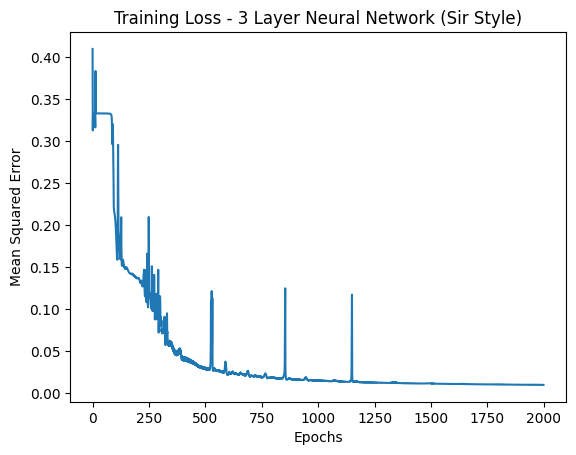

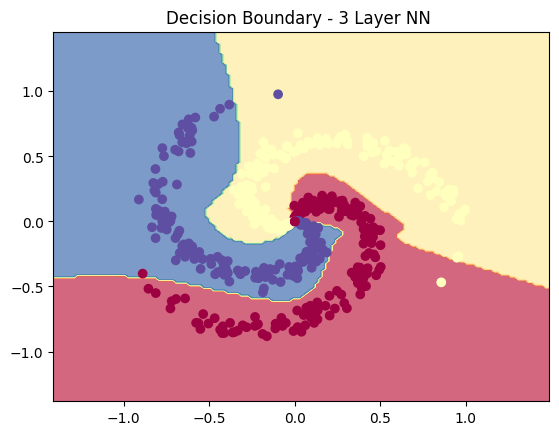

In [12]:
NN = NeuralNetwork3Layer()

err = []
for i in range(2000):
    NN.train(X, Y_matrix)
    loss = np.mean(np.square(Y_matrix - NN.feedForward(X)))
    err.append(loss)

plt.plot(err)
plt.title("Training Loss - 3 Layer Neural Network (Sir Style)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()


def predict_class(X):
    out = NN.feedForward(X)
    return np.argmax(out, axis=1)

# Plot decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = predict_class(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), cmap=plt.cm.Spectral)
plt.title("Decision Boundary - 3 Layer NN ")
plt.show()